In [1]:
#Import the important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Read train and test data
train_data = pd.read_csv('./train.csv', engine = 'python')
test_data = pd.read_csv('./test.csv', engine = 'python')

In [3]:
#First quick look at the data
print(train_data.shape)
train_data.head()


(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#No column of Survived in test data (cannot be used to check the quality of our model)
print(test_data.shape)
test_data.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


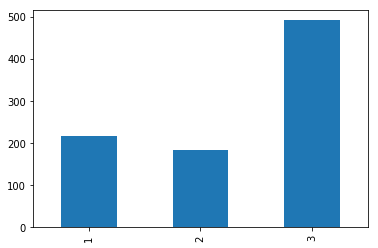

In [6]:
#Plot some info (what class was dying more?)
train_data['Pclass'].value_counts().sort_index().plot.bar()

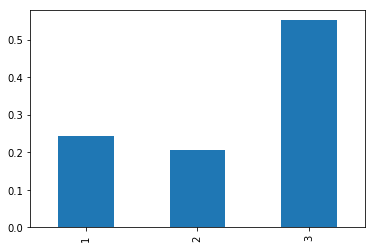

In [7]:
#Show percetages per class
(train_data['Pclass'].value_counts()/len(train_data)).sort_index().plot.bar()

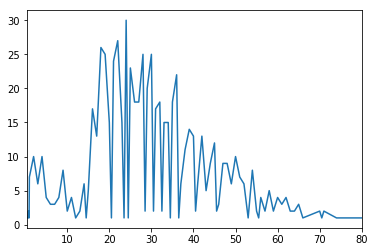

In [10]:
#Distribution of deaths in ages
train_data['Age'].value_counts().sort_index().plot.line()

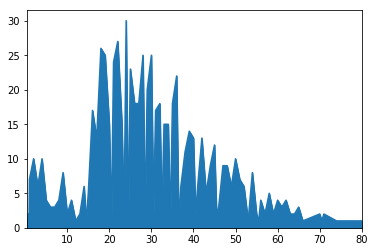

In [11]:
train_data['Age'].value_counts().sort_index().plot.area()

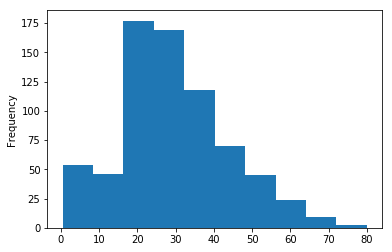

In [12]:
train_data['Age'].plot.hist()

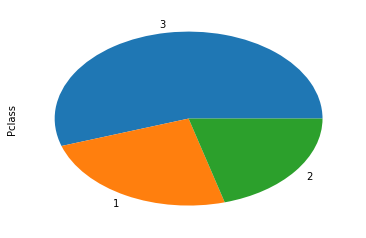

In [13]:
train_data['Pclass'].value_counts().plot.pie()

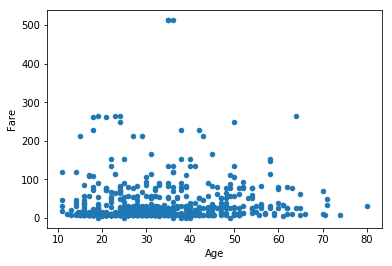

In [4]:
#Scatter plot (relation between age and fare?)
train_data[train_data['Age']>10].plot.scatter(x='Age',y='Fare')

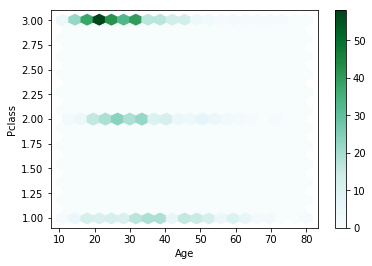

In [8]:
#Relaction age-class: Prediction by plotting
#3rd class more populated by yound people (around 20)
#2nd class has a more or less uniform samplae between 20 and 35 years
#1st class presents hints of two cluster around 30-40 years and 45-55 with some people beyond 60 years old

train_data[train_data['Age']>10].plot.hexbin(x='Age',y='Pclass', gridsize=20)

In [10]:
#Test with numbers if th above prediction is true: Mean age per class (also max and min per curiosity)
train_data.groupby('Pclass').Age.mean()

#There is an averaged 13 years difference between 3rd and 1st class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
train_data.groupby('Pclass').Age.agg([min,max])
#All clases had babies and old peoples -> we can not clearly see the difference in this case

,min,max
Pclass,,
1,0.92,80.0
2,0.67,70.0
3,0.42,74.0


In [9]:
#Plot in 2D
titanic_stats_class = train_data.groupby(['Sex', 'Pclass']).mean()[['Age', 'Fare']]
titanic_stats_class

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

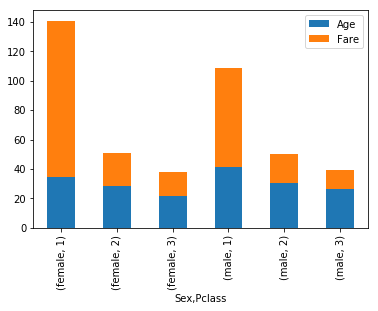

In [10]:
titanic_stats_class.plot.bar(stacked=True)

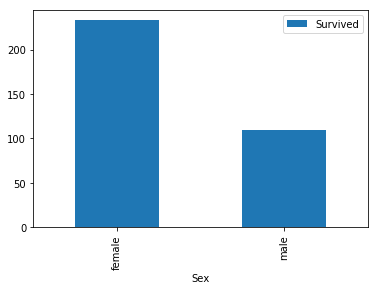

In [12]:
titanic_stats = train_data.groupby(['Sex']).sum()[['Survived']]
titanic_stats.plot.bar()

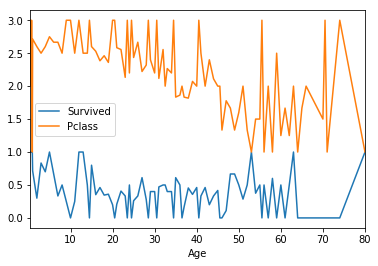

In [14]:
titanic_stats2 = train_data.groupby(['Age']).mean()[['Survived','Pclass']]
titanic_stats2.plot.line()

#MACHINE LEARNING SECTION


In [4]:
#First simple model: Decision tree/ Random Forest with only numerical columns
#The train train will be splitted to study the accuracy of the model (test data has not the desired column)

#Define the target(y) and the features used to train the model(X)
y = train_data.Survived

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [18]:
X.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [5]:
#Removing the 'object'-type columns
X = train_data.drop(['Survived'], axis=1).select_dtypes(exclude=['object'])
X.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [6]:
print(y.shape)
print(X.shape)

#Are there null values on the train data? -> in Age column
col_nan = [col for col in X.columns if X[col].isnull().any()]
print(col_nan)
print(X.Age)

(891,)
(891, 6)
['Age']
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [11]:
#When there are missing values, we can: 1)Drop colums with Nan, 2)Imputate columns with Nan
#We go for the second option because the column is important
#Before that, let us divide in train and test data
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=0)
#Check sizes of the subsets -> Train is bigger (~80%), same number of rows
print(train_X.shape)
print(val_X.shape)
print(train_y.shape)
print(val_y.shape)

#Imputate the missing rows in the Age column, for test and train
#Imputation options can be mean(default) or mean for numeric and most_frequent and constant for categorical data
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, verbose=0, copy=True)
imp_train_X = my_imputer.fit_transform(train_X)
imp_val_X = my_imputer.transform(val_X)


(668, 6)
(223, 6)
(668,)
(223,)


In [12]:
#Check Imputed train_X -> Imputation provides a numpy array with same dimensions as DataFrama and the NaN values filled
#with a given strategy.
print(val_X.head(10))
print(imp_val_X[0:10,:])

print(train_X.head(10))
print(imp_train_X[0:10,:])



     PassengerId  Pclass   Age  SibSp  Parch      Fare
495          496       3   NaN      0      0   14.4583
648          649       3   NaN      0      0    7.5500
278          279       3   7.0      4      1   29.1250
31            32       1   NaN      1      0  146.5208
255          256       3  29.0      0      2   15.2458
298          299       1   NaN      0      0   30.5000
609          610       1  40.0      0      0  153.4625
318          319       1  31.0      0      2  164.8667
484          485       1  25.0      1      0   91.0792
367          368       3   NaN      0      0    7.2292
[[496.       3.      29.9      0.       0.      14.4583]
 [649.       3.      29.9      0.       0.       7.55  ]
 [279.       3.       7.       4.       1.      29.125 ]
 [ 32.       1.      29.9      1.       0.     146.5208]
 [256.       3.      29.       0.       2.      15.2458]
 [299.       1.      29.9      0.       0.      30.5   ]
 [610.       1.      40.       0.       0.     153.46

In [14]:
#Create a function to test the accuray of the models
#To test the change in the number of columns, the different ML models, of the different strategies
#Inputation and hot-encoding

from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

def checkModelAcuracy(model, X_train, X_test, y_train, y_test):   
    
    if model == 'DT':
            mymodel = DecisionTreeRegressor()

    elif model == 'RF': 
        mymodel = RandomForestRegressor()
        
    mymodel.fit(X_train, y_train)
    preds = mymodel.predict(X_test)
    return mean_absolute_error(y_test, preds)

#Try both models
print('The mean absolute error for Decision Tree: {}'.format(checkModelAcuracy('DT', imp_train_X, imp_val_X, train_y, val_y)))
    
print('The mean absolute error for Random Forest: {}'.format(checkModelAcuracy('RF', imp_train_X, imp_val_X, train_y, val_y)))

    

The mean absolute error for Decision Tree: 0.367713004484
The mean absolute error for Random Forest: 0.339910313901


/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [3]:
#Add categorical data (encoded) to the training sample
#We redefine the target and features variables
y = train_data.Survived
X = train_data.drop(['Survived'], axis=1)

X.head()

#Check the columns that contain NaN values and the amount of unique values.
print('Columns with NaN:\n', X.isnull().sum())

print('Unique values per columns:\n', X.nunique())


#Check size of train sample
print('Train sample dimensions', X.shape)

#--Conclusions--
#We will drop Cabin since we have more than 77% of missing values
#We will also drop Ticket and and PassegerId for the high number of distinct values.
drop_columns = ['PassengerId','Ticket', 'Cabin']
X = train_data.drop(drop_columns, axis =1)
X.head()

('Columns with NaN:\n', PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64)
('Unique values per columns:\n', PassengerId    891
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64)
('Train sample dimensions', (891, 11))


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [4]:
#Fill the NaN values and Enconde the the categorical variables
#First divide in train and test
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=0)

#We create a list of databases in order to clean/impute them together
total_X = [train_X, val_X]
type(total_X)

#We fill the NaN in Age and Embarked (No Imputer this time since there are different data types)

for db in total_X:
    db['Age'].fillna(db['Age'].median(), inplace = True)
    db['Embarked'].fillna(db['Embarked'].mode()[0], inplace = True)
    
#Check if the values have been correctly filled
for db in total_X:
    print('Columns with NaN:\n', db.isnull().sum())
    
train_X.head()

('Columns with NaN:\n', Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64)
('Columns with NaN:\n', Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64)


/usr/local/lib/python2.7/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,7.8958,S
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S
253,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S
320,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,7.2500,S
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,13.5000,S


In [5]:
#The columns SibSp (siblings/spouse) and Parch (parents/children) provide information about the number
#of member of the family inside the boat -> Create new column containing this
for db in total_X:
    db['FamilySize'] = db['SibSp'] + db['Parch'] + 1
    db['IsAlone'] = 1 #initialize to yes/1 is alone
    db['IsAlone'].loc[db['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1


    #From the name, we can obtain the title to check if it has influence in the fact of survival    
    db['Title'] = db['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
    
train_X.head()   


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,7.8958,S,1,1,Mr
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S,7,0,Miss
253,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S,2,0,Mr
320,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,7.2500,S,1,1,Mr
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,13.5000,S,1,1,Mrs


In [22]:
print('For the train data\n', train_X['Title'].value_counts())
print('For the test data\n', val_X['Title'].value_counts())

#We remove the titles that are less frequent (>20) and susbtitute them.
#First, we create a series of booleans to know which values to subtitute
for db in total_X:
    substitute_names = (db['Title'].value_counts() < 10)
    #apply and lambda functions are quick and dirty find and replace with fewer lines of code
    db['Title'] = db['Title'].apply(lambda x: 'Misc' if substitute_names.loc[x] == True else x)
    print(db['Title'].value_counts())

train_X.head(20)

('For the train data\n', Mr        394
Miss      132
Mrs        93
Master     33
Misc       16
Name: Title, dtype: int64)
('For the test data\n', Mr      123
Miss     50
Mrs      32
Misc     18
Name: Title, dtype: int64)
Mr        394
Miss      132
Mrs        93
Master     33
Misc       16
Name: Title, dtype: int64
Mr      123
Miss     50
Mrs      32
Misc     18
Name: Title, dtype: int64


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
105,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,7.8958,S,1,1,Mr
68,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S,7,0,Miss
253,0,3,"Lobb, Mr. William Arthur",male,30.0,1,0,16.1000,S,2,0,Mr
320,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,7.2500,S,1,1,Mr
706,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,13.5000,S,1,1,Mrs
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0000,S,1,1,Mr
424,0,3,"Rosblom, Mr. Viktor Richard",male,18.0,1,1,20.2125,S,3,0,Mr
752,0,3,"Vande Velde, Mr. Johannes Joseph",male,33.0,0,0,9.5000,S,1,1,Mr
615,1,2,"Herman, Miss. Alice",female,24.0,1,2,65.0000,S,4,0,Miss
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss


In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
#Encode the object-type data
#Sex -> Using a dict+replace due to the small number of vales
sex_encode = {'Sex' : {'male': 0, 'female': 1}}
for db in total_X:
    db.replace(sex_encode, inplace=True)
    
#Title, Embarqued -> test with an alternative: Label Encoder
label = LabelEncoder()
for db in total_X:   
    db['Embarked_Code'] = label.fit_transform(db['Embarked'])
  #  db['Title_Code'] = label.fit_transform(db['Title'])
    

    

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'